# Group O
## Online Social Network and Peace in Society
* Fahad
* David Odafe
* Raheel
* Aysha

## Table of Contents
####1) look onto Dataset
####2) Data Preprocessing
####3) Data Analysis
####4) NLP Model - Training and Validation
####5) Summary
####6) Where can we implement this model elsewhere

#1- About the Dataset
## Each sample in the train and test set has the following information:
* The title of the new article.
* The text of the new article against each title.
* The subject for the news article.
* Date of the new article

#### I am predicting whether a given news is about a real news or not. If so, predict a 1. If not, predict a 0.

#### I'm using the Kaggle dataset (https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset)

#2- Data Pre Processing

In [1]:
# Importing Libraries that we are going to use in this model
#Fundamental pre processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lib for NLP processing
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Download the Dataset from Kaggle as I attached the link above
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset'
od.download(dataset_url)

Saving kaggle.json to kaggle.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 41.0M/41.0M [00:00<00:00, 136MB/s] 


In [5]:
# Looking into some sample records
real_news = pd.read_csv('/content/fake-and-real-news-dataset/True.csv')
fake_news = pd.read_csv('/content/fake-and-real-news-dataset/Fake.csv')
real_news.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#3- Data Analysis

#### So now we will go through an exploratory data analysis to get insights from the news article. The aim here is to divide this session into topics so we can explore graphics for each subject.

In [6]:
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [7]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
# size of our dataset
print(real_news.shape)
print(fake_news.shape)

(21417, 4)
(23481, 4)


In [9]:
# We add a column each in both the dataset to identify the real and fake new articles. We denote real news as 1 and fake with 0

real_news['FakeOrNot'] = 1
fake_news['FakeOrNot'] = 0

In [10]:
# Let's have a look on the columns of our datasets

for colmns in real_news.columns:
  print(colmns)

title
text
subject
date
FakeOrNot


In [12]:
for colmns in fake_news.columns:
  print(colmns)

title
text
subject
date
FakeOrNot


In [14]:
fake_news['FakeOrNot'][44:49], real_news['FakeOrNot'][44:49]

(44    0
 45    0
 46    0
 47    0
 48    0
 Name: FakeOrNot, dtype: int64, 44    1
 45    1
 46    1
 47    1
 48    1
 Name: FakeOrNot, dtype: int64)

In [15]:
# Now we combine both the individual dataset so that we can analyses the complete dataset

News_Dataset = pd.concat([real_news, fake_news], ignore_index=True)
News_Dataset.head()

,title,text,subject,date,FakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [16]:
# As we are running the analysis with the news titles hence the remaining columns are not required.

News_Dataset = News_Dataset.drop(['text', 'subject', 'date'], axis = 1)
News_Dataset

,title,FakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44896,How to Blow $700 Million: Al Jazeera America F...,0


In [17]:
News_Dataset.FakeOrNot.value_counts()

0    23481
1    21417
Name: FakeOrNot, dtype: int64

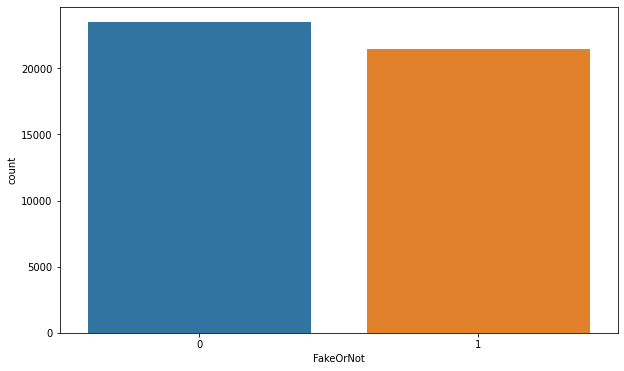

In [18]:
# Plot the Fake and Real news in dataset
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = News_Dataset, x='FakeOrNot')
plt.show()

In [19]:
# checking for null values in dataset before initiate NLP model
News_Dataset[News_Dataset.isnull().any(axis=1)]

,title,FakeOrNot


## Cleaning, Formatting and Lemmatization

#### Let are now remove all the string punctuation(like !”#$%&’()*+,-./:;<=>?@[\]^_`{|}~), We can achieve this by simple keeping the work from [a-z] and [A-Z] and replacing the rest of the words with space.

In [21]:
nltk.download('wordnet')
wordnet=WordNetLemmatizer()
corpus = []

for i in range(0, len(News_Dataset)):
    review = re.sub('[^a-zA-Z]', ' ', News_Dataset['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...


LookupError: ignored

In [23]:
import nltk

In [24]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [25]:
nltk.download('wordnet')
wordnet=WordNetLemmatizer()
corpus = []

for i in range(0, len(News_Dataset)):
    review = re.sub('[^a-zA-Z]', ' ', News_Dataset['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#4- Natural Language Processing

#### Training and Validation (Bag of words & TF IDF)

In [26]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(2,2))
X = cv.fit_transform(corpus).toarray()

In [28]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

y=News_Dataset['FakeOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [29]:
# check the features name for first 20
cv.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abc news',
 'abe say',
 'abortion law',
 'abortion right',
 'abortion video',
 'absolutely destroys',
 'accept election',
 'access pipeline',
 'accuses obama',
 'accuses trump',
 'across america',
 'act terror',
 'acting like',
 'action gun',
 'action north',
 'active shooter',
 'actor george',
 'actor james',
 'ad campaign',
 'ad video']

In [30]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,abc news,abe say,abortion law,abortion right,abortion video,absolutely destroys,accept election,access pipeline,accuses obama,accuses trump,...,young woman,yr old,zika funding,zika virus,zimbabwe army,zimbabwe military,zimbabwe mnangagwa,zimbabwe mugabe,zimbabwe opposition,zimbabwe ruling
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Applying ML Models using Sklearn (Bag of words)
#### Multinomial models are more suited for processing text related features extracted using Bag of words

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [32]:
from sklearn import metrics
import numpy as np
import itertools

In [33]:
# Fit the model on trainig datasets

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)


accuracy:   0.809


## Evaluating Results
#### We write the below functions to build the confusion matrix visualizations.

Confusion matrix, without normalization


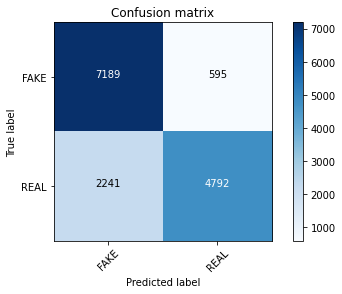

In [34]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [35]:
# Predict the targeted labels and features

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8085982317608152

## Implementing hyper parameterization(Bag of Words)
#### Multinomial Classifier with Hyperparameter

In [36]:

classifier=MultinomialNB(alpha=0.1)


previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0, Score : 0.8108928932982385
Alpha: 0.1, Score : 0.8112303435243302
Alpha: 0.2, Score : 0.8106904231625836
Alpha: 0.30000000000000004, Score : 0.8098130525747452
Alpha: 0.4, Score : 0.8096105824390902
Alpha: 0.5, Score : 0.8094081123034352
Alpha: 0.6000000000000001, Score : 0.8096105824390902
Alpha: 0.7000000000000001, Score : 0.8094081123034352
Alpha: 0.8, Score : 0.8087332118512519
Alpha: 0.9, Score : 0.8087332118512519


In [37]:
## Get Features names
feature_names = cv.get_feature_names()
feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abc news',
 'abe say',
 'abortion law',
 'abortion right',
 'abortion video',
 'absolutely destroys',
 'accept election',
 'access pipeline',
 'accuses obama',
 'accuses trump',
 'across america',
 'act terror',
 'acting like',
 'action gun',
 'action north',
 'active shooter',
 'actor george',
 'actor james',
 'ad campaign',
 'ad video',
 'adam schiff',
 'administration video',
 'admits obama',
 'admits trump',
 'adviser flynn',
 'adviser say',
 'afghan capital',
 'africa anc',
 'africa ramaphosa',
 'africa zuma',
 'african american',
 'african refugee',
 'african republic',
 'ag jeff',
 'ag loretta',
 'ag session',
 'agent say',
 'agrees trump',
 'ahead election',
 'ahead new',
 'ahead trump',
 'ahead vote',
 'aid minister',
 'aid worker',
 'aide flynn',
 'aim trump',
 'air base',
 'air defense',
 'air force',
 'air strike',
 'air traffic',
 'aircraft carrier',
 'al franken',
 'al gore',
 'al qaeda',
 'al shabaab',
 'al sharpton',
 'al zor',
 'alabama republican',
 'alabama senate'

In [38]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [40]:
cv.get_feature_names()[:20]

['aa',
 'aar',
 'aardvark',
 'aaron',
 'aarp',
 'abadi',
 'abandon',
 'abandoned',
 'abandoning',
 'abbas',
 'abbott',
 'abc',
 'abdeslam',
 'abdicate',
 'abdication',
 'abdo',
 'abduct',
 'abducted',
 'abduction',
 'abdul']

In [41]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

count_df.head()

ValueError: ignored

## Applying ML Models using SKlearn & Evaluating Results (TF IDF)


accuracy:   0.809
Confusion matrix, without normalization


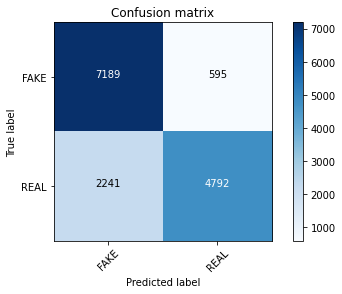

In [42]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [43]:
# Implementing hyper parameterization(Tf IDF)

classifier=MultinomialNB(alpha=0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0, Score : 0.8108928932982385
Alpha: 0.1, Score : 0.8112303435243302
Alpha: 0.2, Score : 0.8106904231625836
Alpha: 0.30000000000000004, Score : 0.8098130525747452
Alpha: 0.4, Score : 0.8096105824390902
Alpha: 0.5, Score : 0.8094081123034352
Alpha: 0.6000000000000001, Score : 0.8096105824390902
Alpha: 0.7000000000000001, Score : 0.8094081123034352
Alpha: 0.8, Score : 0.8087332118512519
Alpha: 0.9, Score : 0.8087332118512519


#5- Summary

* We downloaded the Fake News Dataset from Kaggle.
* We performed the NLP preprocess and EDA to understand the labels distribution.
* We trained the model using both Bag of words and TF IDF.
* Implemented hyperparameters to achieve maximum accuracy.
* We analyzed the accuracy, For TFIDF we achieved the accuracy of 93% and for Bag of words it is 80% and conclude TF IDF have performed better than bag of words.

#6- Where can we implement this model elsewhere

* We can increase the accuracy by implementing Word2Vec
* We can either use Large dataset to improve the accuracy
* We can use this model on either peer-to-peer communication
* We can use this model in any plateform that uses the text as communication 
* The concept should be the same but we can build logic according to the platform where can we implement this.